### Mathematical Models for Time Series Example 4.1:
We compute the estimators above for simulated data. First we simulate a realization of a moving average process.

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)

# White noise signal
w = np.random.normal(size=1000, loc=2, scale=0.1)
w = pd.DataFrame(w)
# Filter with window = 3
w = w.rolling(window=3).mean()

In `Python`, the autocovariance and -correlation can be computed with the `acof()` and `acf()` (from `statsmodels.tsa.stattools`) respectively. During the application of the moving average (in the `rolling` command), missing values are created at the boundaries. To omit `NaN` entries, the setting `missing` is set to `drop`.

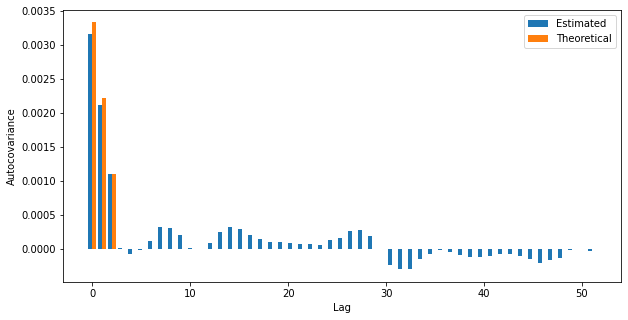

In [2]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acovf

# Autocovariance
ac = acovf(w, fft=False, missing='drop', nlag=50)

# Theoretical autocovariance
sigma = 0.1
act = np.zeros(len(ac))
act[0] = 3 / 9 * sigma**2
act[1] = 2 / 9 * sigma**2
act[2] = 1 / 9 * sigma**2


# plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

width = 0.4
x = np.linspace(0, len(ac), len(ac))
ax.bar(x - width / 2, ac, width=width, label='Estimated')
ax.bar(x + width / 2, act, width=width, label='Theoretical')
plt.xlabel("Lag")
plt.ylabel("Autocovariance")
plt.legend()

plt.show()

The `nlag` parameter sets the maximal lag up to which the autocovariance should be computed. The figure shows the autocovariance of the moving average data. It can be seen that the lags $h=0,1,2$ produce a significant value and that for $h>2$ the autocovariance is very small. This is in accordance with the theoretical results. We add the values of the true autocovariance for comparison. Nevertheless, the sample autocovariance shows an oscillating pattern which we will comment on below.

### Mathematical Models for Time Series Example 4.2:
We again consider the moving average process. The following command produces the correlogram.

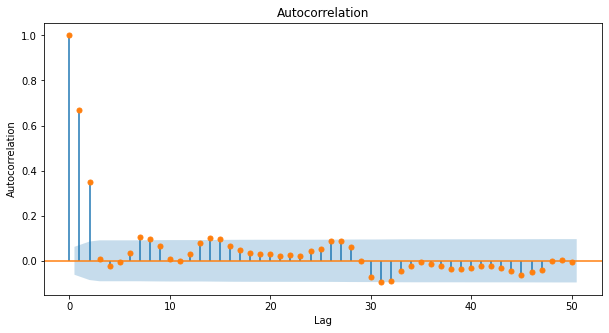

In [3]:
from statsmodels.graphics.tsaplots import plot_acf

# plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
plot_acf(w, missing='drop', lags=50, ax=ax, c='C1')
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

The two-sigma confidence bands are drawn automatically and we see that starting from the $3$rd all lags produce an autocorrelation which is in the band. In practice, once the estimated autocorrelation stays within these bands one sets it to 0 (A more formal way of testing is the _Ljung-Box test_ that tests the null-hypothesis that a number of autocorrelation coefficients is zero. The test is implemented in the `statsmodels.stats.diagnostic.acorr_ljungbox()`) 